### Задание простого времени

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from numpy.linalg import inv
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import csv

In [2]:
df = pd.read_csv("non_linear.csv")

In [15]:
X = df[['x_train']]
y = df['y_train']

In [33]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

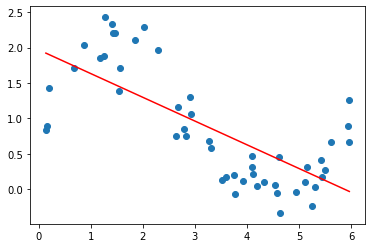

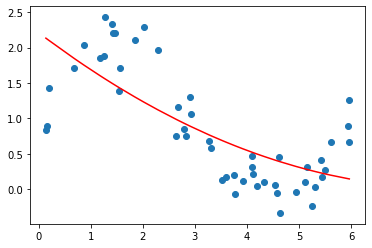

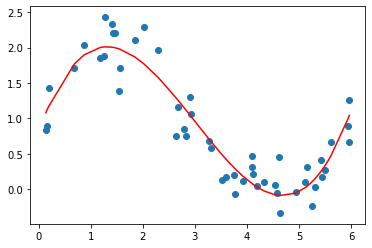

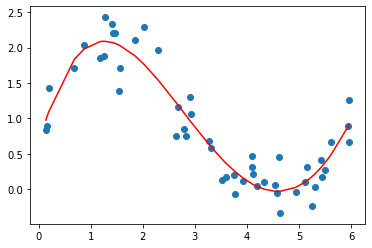

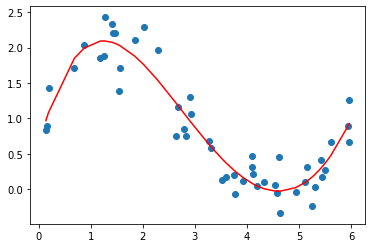

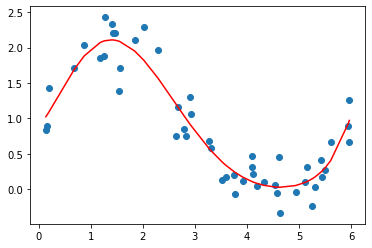

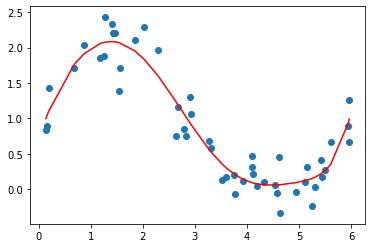

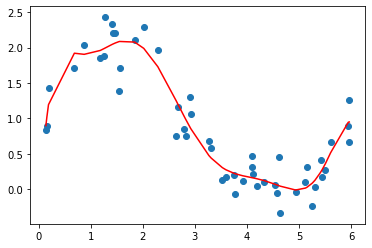

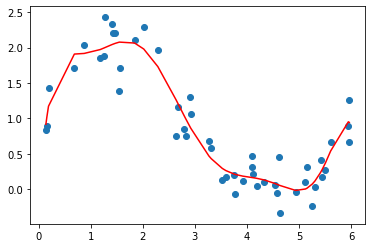

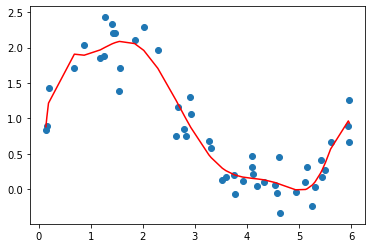

Оптимальная степень полинома 10, метрика при которой равна 0.9.


In [161]:
def arr(x, num):
    """ Возвращает массив, преообразованный к соответствующему степени виду"""
    
    return np.array([x**i for i in range(1, num+1)]).T


results = {}
for i in range(1, 11):
    X = arr(df.x_train, i)
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    error = r2_score(y_pred, y)
    results[i] = error
    plt.scatter(df.x_train, y)
    plt.plot(df.x_train, y_pred, c="red")
    plt.show()
    
print(f"Оптимальная степень полинома {np.argmax(list(results.values()))+1}, \
метрика при которой равна {np.round(np.max(list(results.values())), 2)}.")

### Задание среднего времени

In [245]:
class MyRegressor:
    X = None
    X = []
    y = None
    y = []
    
    def fit(self, a, b):
        for i in range(len(a)):
            self.X.append([1, a[i]])
            self.y.append([b[i]])
        self.X = np.array(self.X)
        self.y = np.array(self.y)
        w = inv((self.X.T).dot(self.X)).dot(self.X.T).dot(self.y)
        return self.X
    
    def predict(self, a):
        y_pred = w[0][0] + w[1][0]*a[:, 1]
        return y_pred
    
linarg = MyRegressor()

X = df["x_train"]
y = df["y_train"]
y_pred = linarg.predict(linarg.fit(X, y))

### Задание сложного времени

In [94]:
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_pred, y_test)

0.6863605745360066

In [100]:
X_train = StandardScaler().fit_transform(X_train)
y_train = StandardScaler().fit_transform(y_train.reshape(-1, 1))
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_pred, y_test)

-3.3701611840666734